#### Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import style
style.use("fivethirtyeight")

# Loading the data

In [3]:
df = pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q6\loan_dataset.csv')

In [4]:
df1 = df.copy()

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

 </p> 8  Object data type means variables are categorical</p>

In [10]:
df.shape

(614, 13)

<h2>Target variable Loan_status </h2>




In [10]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [12]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

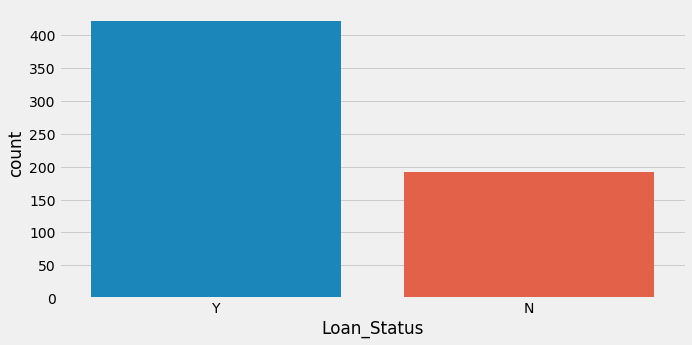

In [13]:
plt.figure(figsize = (10, 5))
sns.countplot(data["Loan_Status"])
plt.show()

# Univariate Analysis


<p>In this we explore each feature individually</p>
<p>For categorical variables we use frequency tables or bar graphs or pie charts</p>
<p>For numerical(continuous) variables we use histogram or probability density plots</p>

In [14]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

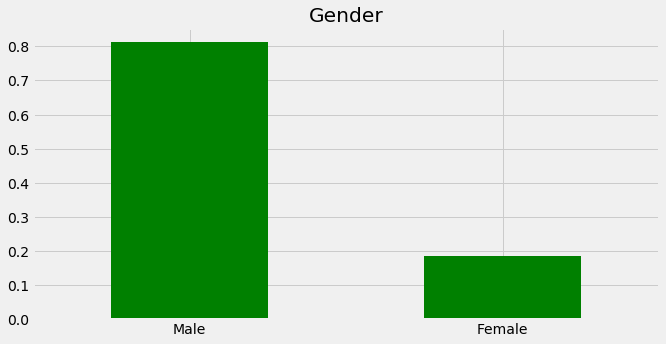

In [15]:
data["Gender"].value_counts(normalize = True).plot.bar(figsize = (10,5), color = "g")
plt.xticks(rotation = 0)
plt.title("Gender")
plt.show()

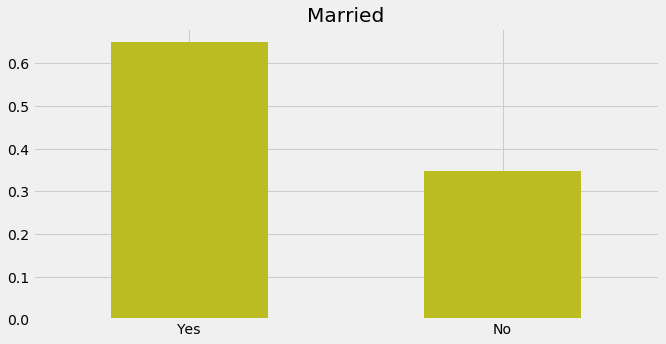

In [16]:
data["Married"].value_counts(normalize = True).plot.bar(color = "tab:olive", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Married")
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

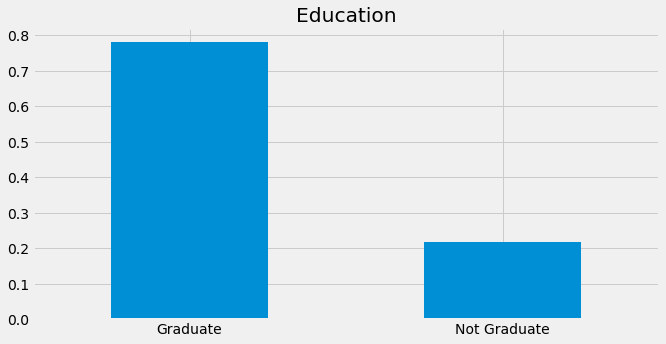

In [17]:
data["Education"].value_counts(normalize = True).plot.bar(title = "Education", figsize = (10, 5))
plt.xticks(rotation = 0)

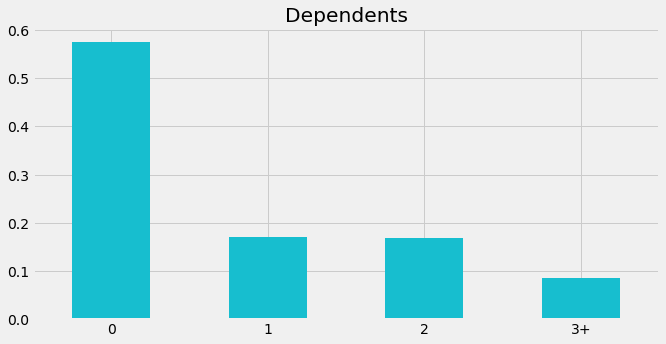

In [18]:
data["Dependents"].value_counts(normalize = True).plot.bar(color = "tab:cyan",
                                                           title = "Dependents",
                                                          figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

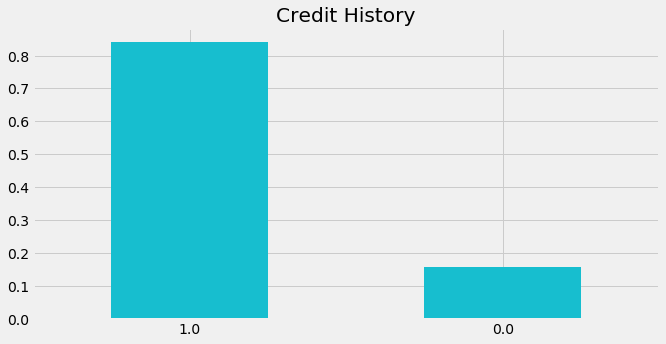

In [19]:
data["Credit_History"].value_counts(normalize = True).plot.bar(color= "tab:cyan", 
                                                               title = "Credit History", 
                                                               figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

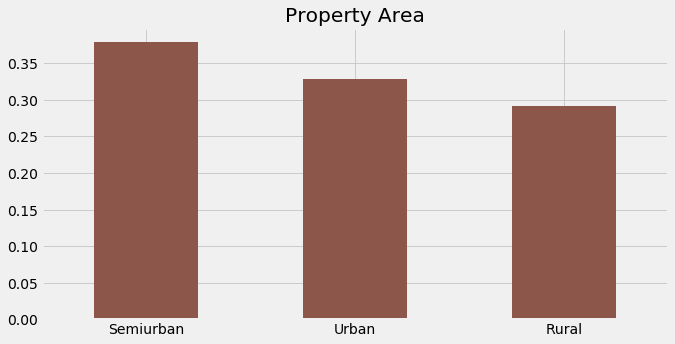

In [20]:
data["Property_Area"].value_counts(normalize = True).plot.bar(color = "tab:brown", 
                                                              title = "Property Area", 
                                                              figsize = (10, 5))
plt.xticks(rotation = 0)
plt.show()

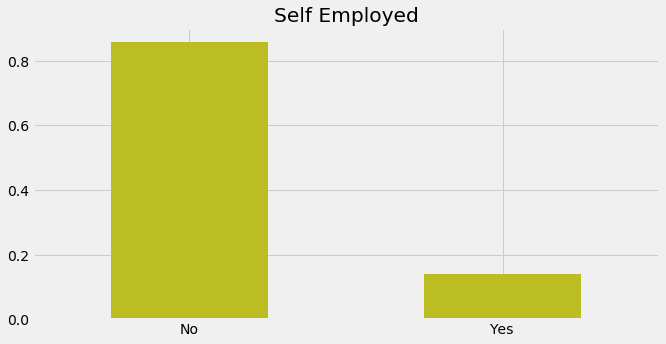

In [21]:
data["Self_Employed"].value_counts(normalize = True).plot.bar(color = "tab:olive", title = "Self Employed", figsize = (10,5))
plt.xticks(rotation = 0)
plt.show()

# Numerical Variables

In [22]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<h2>Applicant Income</h2>


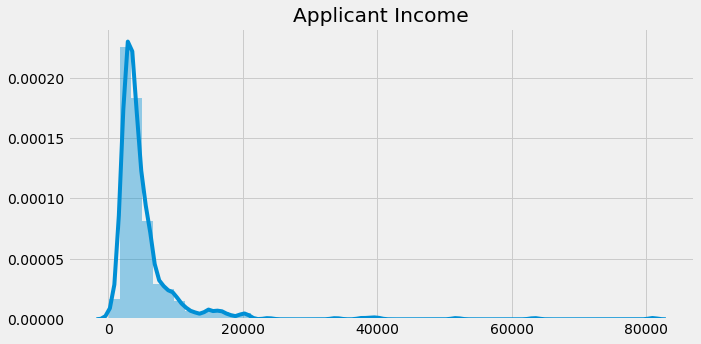

In [23]:
plt.figure(figsize = (10, 5))
plt.title("Applicant Income")
sns.distplot(data["ApplicantIncome"])
plt.xlabel(None)
plt.show()

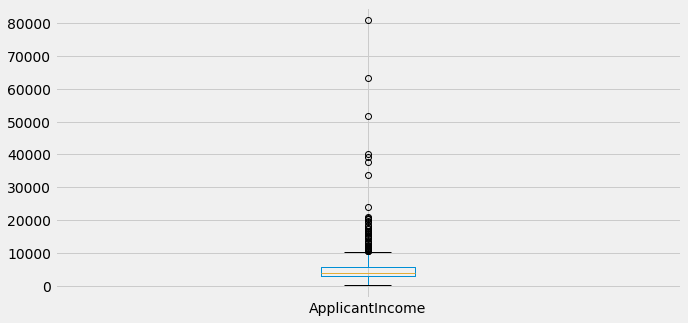

In [24]:
data["ApplicantIncome"].plot.box(figsize = (10, 5))
plt.show()

In [25]:
data["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<p>Applicant Income is having many outliers but that may be due to income disparity in the society</p>
<p>Let's group it by education to have more insights</p>


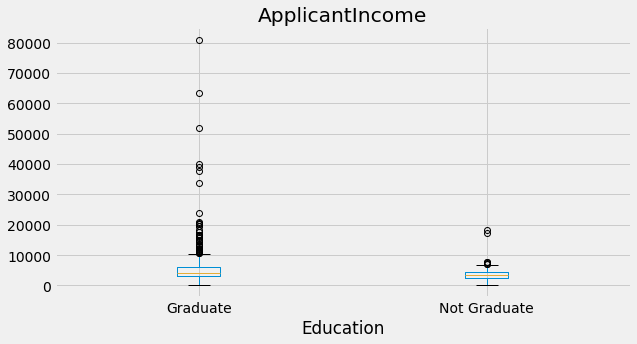

In [26]:
data.boxplot(column = "ApplicantIncome", by = "Education", figsize = (10, 5))
plt.suptitle("")
plt.show()

<h2>CoApplicantIncome</h2>

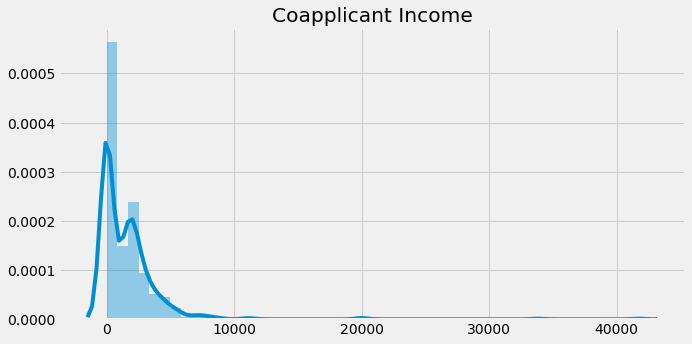

In [27]:
plt.figure(figsize = (10, 5))
plt.title("Coapplicant Income")
sns.distplot(data["CoapplicantIncome"])
plt.xlabel(None)
plt.show()

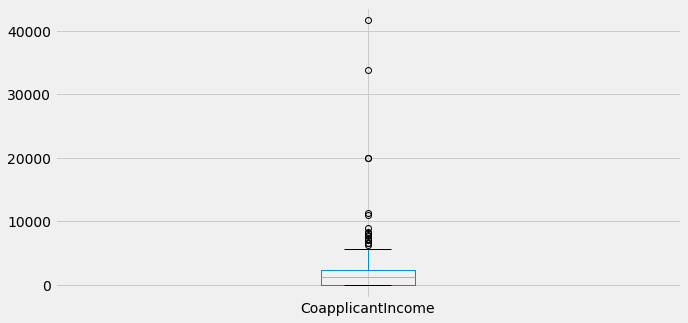

In [28]:
plt.figure(figsize = (10, 5))
data["CoapplicantIncome"].plot.box(figsize = (10, 5))
plt.show()

<h2>Loan Amount</h2>

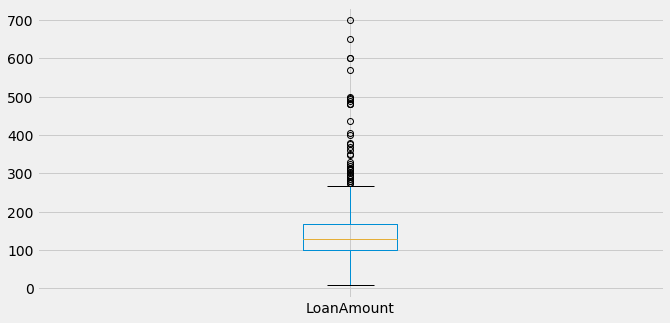

In [29]:
data["LoanAmount"].plot.box(figsize = (10, 5))
plt.show()

A lot of outliers are there in Loan Amount feature

# Bivariate Analysis

<h2>Categorical v/s Categorical</h2>

<h3>Loan Status v/s Gender</h3>

In [30]:
gl = pd.crosstab(data["Gender"], data["Loan_Status"])

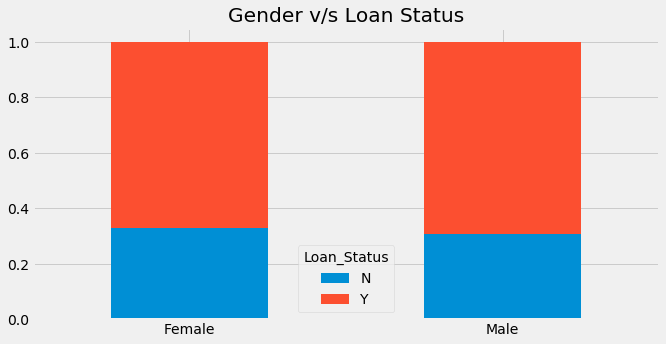

In [31]:
gl.div(gl.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5), title = "Gender v/s Loan Status")
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.show()

<h3>Loan Status v/s Married</h3>

In [32]:
Married = pd.crosstab(data["Married"], data["Loan_Status"])

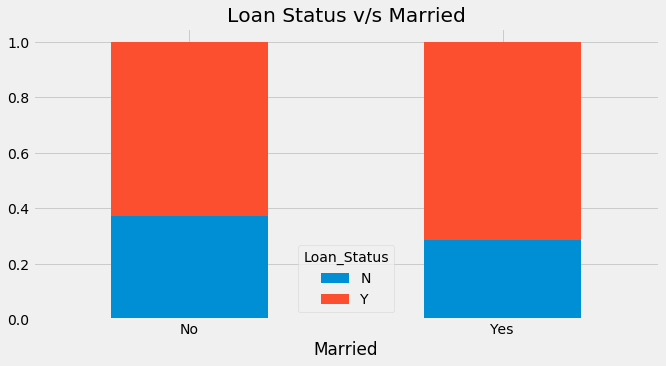

In [33]:
Married.div(Married.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10,5), 
                                                      title = "Loan Status v/s Married")
plt.xticks(rotation = 0)
plt.show()

Inference = Married applicants have a higher proportion for loan acceptance

<h2> Loan Status v/s Dependents</h2>

In [34]:
LoanStatus = pd.crosstab(data["Dependents"], data["Loan_Status"])

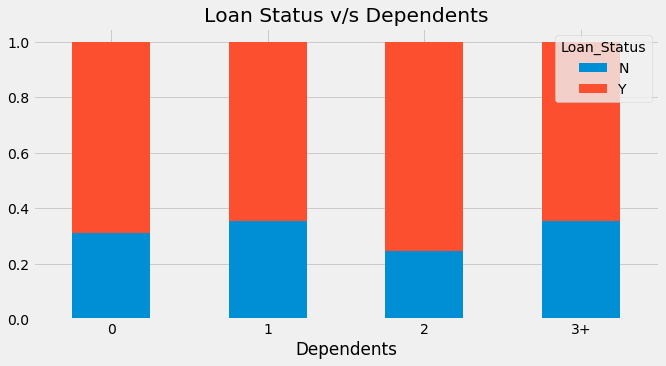

In [35]:
LoanStatus.div(LoanStatus.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Dependents")
plt.xticks(rotation = 0)
plt.show()

<h2>Loan Status v/s Education</h2>

In [36]:
Education_p = pd.crosstab(data["Loan_Status"], data["Education"])

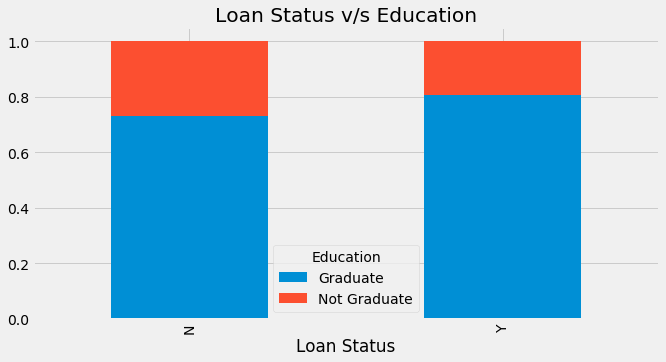

In [37]:
Education_p.div(Education_p.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xlabel("Loan Status")
plt.title("Loan Status v/s Education")
plt.show()

<h2>Loan Status v/s Self Employed</h2>


In [38]:
SelfEmployed_p = pd.crosstab(data["Loan_Status"], data["Self_Employed"])

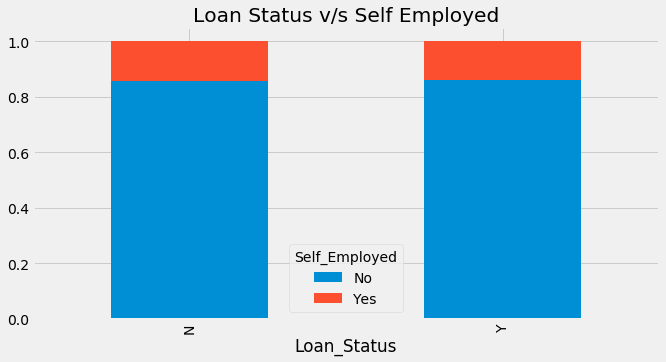

In [39]:
SelfEmployed_p.div(SelfEmployed_p.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Self Employed")
plt.show()

No inference can be made from the above plot

<h3>Credit History v/s Loan Status</h3>


In [40]:
CreditHistory_p = pd.crosstab(data["Credit_History"], data["Loan_Status"])

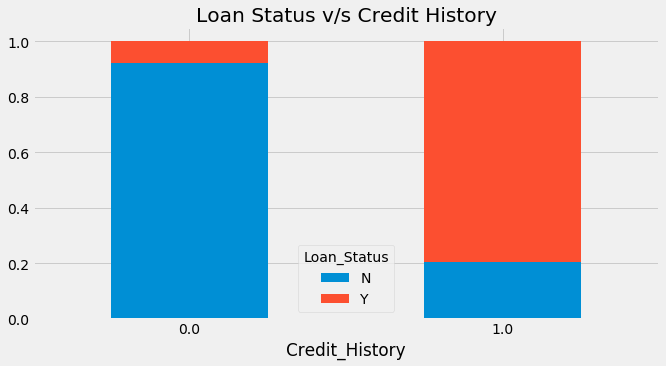

In [41]:
CreditHistory_p.div(CreditHistory_p.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.title("Loan Status v/s Credit History")
plt.xticks(rotation = 0)
plt.show()

<strong>Inference</strong>= People with good credit history are more likely to get a loan 

<h3>Property Area v/s Loan Status</h3>

In [42]:
Property_Area_p = pd.crosstab(data["Property_Area"], data["Loan_Status"])

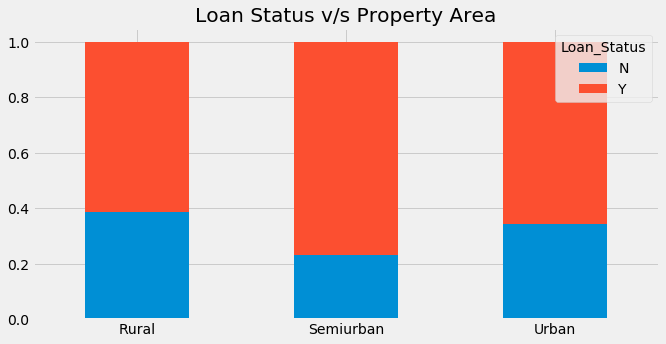

In [43]:
Property_Area_p.div(Property_Area_p.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Property Area")
plt.xlabel(None)
plt.show()

Inference = Proportion of loans getting approved in semiurban area is higher than rural and urban areas

# Numerically Independent variable v/s Target Variable

<h3>Applicant Income v/s Loan Status</h3>

In [44]:
data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


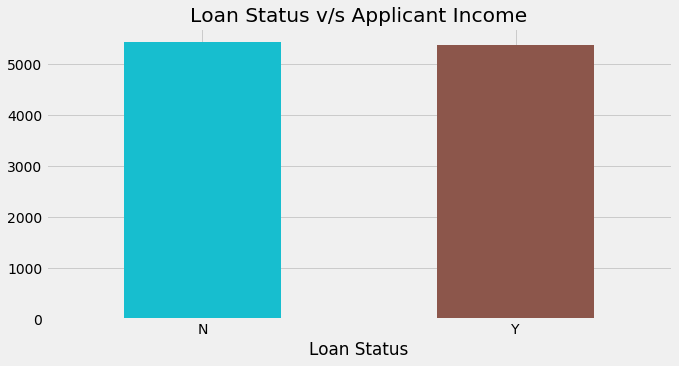

In [45]:
data.groupby('Loan_Status').mean()["ApplicantIncome"].plot.bar(color = ["tab:cyan", "tab:brown"], figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Applicant Income")
plt.xlabel("Loan Status")
plt.show()

<p>Using above plot we can't infer anything.</p>


Binning ApplicantIncome to get more insight

In [46]:
bins = [0, 2500, 4000, 6000, 81000]
group = ["low", "average", "high", "very_high"]

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [47]:
data['Income_bin'] = pd.cut(x = data["ApplicantIncome"], bins = bins, labels = group)

In [48]:
data['Income_bin'].head()

0       high
1       high
2    average
3    average
4       high
Name: Income_bin, dtype: category
Categories (4, object): [low < average < high < very_high]

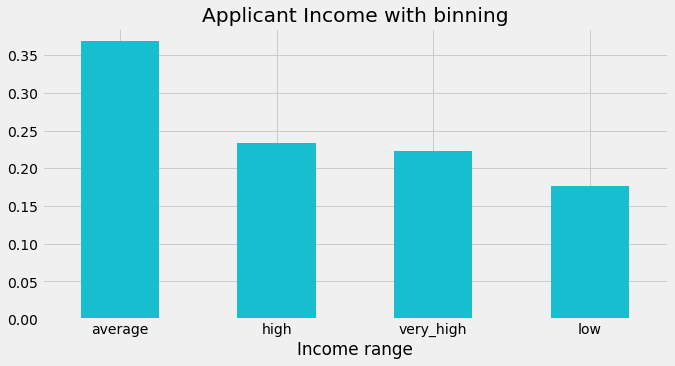

In [49]:
data['Income_bin'].value_counts(normalize = True).plot.bar(color = "tab:cyan", figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Applicant Income with binning")
plt.xlabel("Income range")
plt.show()

<h3>Binned income v/s Loan Status


In [50]:
pd.crosstab(data["Income_bin"], data["Loan_Status"], normalize="index")

Loan_Status,N,Y
Income_bin,,
low,0.314815,0.685185
average,0.296460,0.703540
high,0.314685,0.685315
very_high,0.335766,0.664234


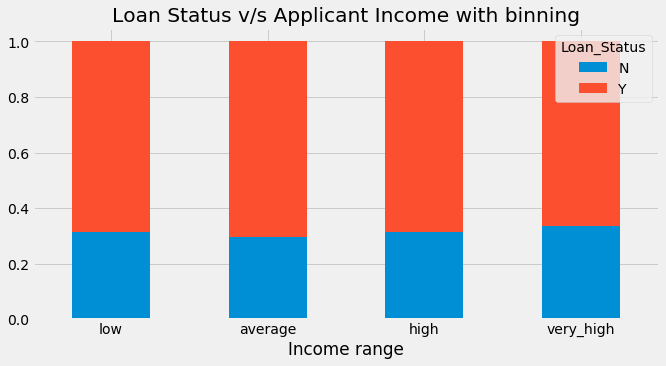

In [51]:
pd.crosstab(data["Income_bin"], data["Loan_Status"], normalize="index").plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Loan Status v/s Applicant Income with binning")
plt.xlabel("Income range")
plt.show()

From this plot, it can be inferred that loan approval doesn't depend on Applicant Income
<p>So this contradicts our hypothesis</p>

<h2>Co Applicant Income v/s Loan Status</h2>

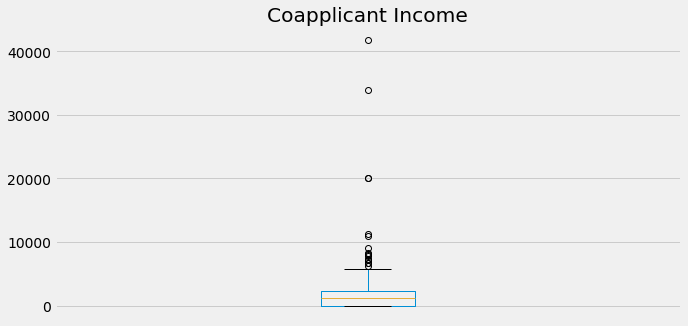

In [52]:
data['CoapplicantIncome'].plot.box(figsize = (10, 5)) # used to decide bins
plt.xticks(rotation = 0)
plt.title("Coapplicant Income")
plt.xticks([])
plt.show()

<h3> Binning Coapplicant Income</h3>

In [53]:
bins = [0,1000, 4000, 42000]
labels = ["low", "average", "high"]

In [54]:
data["CoapplicantIncome_bin"] = pd.cut(data["CoapplicantIncome"], bins, labels = labels, include_lowest= True)

In [55]:
data["CoapplicantIncome_bin"].head()

0        low
1    average
2        low
3    average
4        low
Name: CoapplicantIncome_bin, dtype: category
Categories (3, object): [low < average < high]

<h3>Coapplicant Income bin v/s Loan Status </h3>

In [56]:
CoapplicantIncome_bin = pd.crosstab(data["CoapplicantIncome_bin"], data["Loan_Status"])

In [57]:
CoapplicantIncome_bin

Loan_Status,N,Y
CoapplicantIncome_bin,,
low,99,196
average,74,190
high,19,36


In [58]:
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(axis = 1), axis = 0)

Loan_Status,N,Y
CoapplicantIncome_bin,,
low,0.335593,0.664407
average,0.280303,0.719697
high,0.345455,0.654545


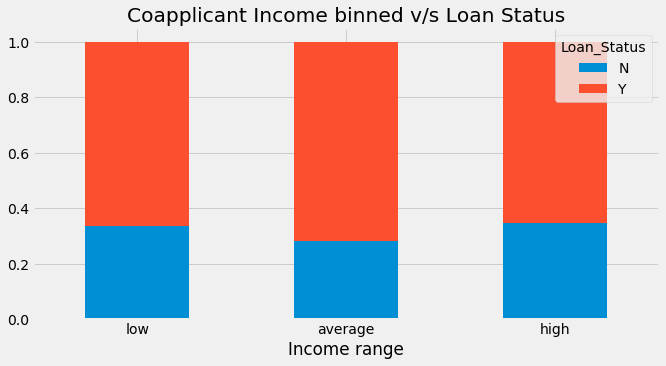

In [59]:
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.title("Coapplicant Income binned v/s Loan Status")
plt.xlabel("Income range")
plt.show()

People with low applicant Income having equal proportion of loan acceptance as people with high income applicant.This looks wrong.
<br>
This may be because most of the people don't have a coapplicant.
<br>
So total income = applicant income + coapplicant income may be a good feature.

<h2>Total Income</h2>

In [60]:
data["total_income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [61]:
bins = [0, 2500, 4000, 6000, 81000]
groups = ["low", "average", "high", "very high"]

In [62]:
data["total_income_bin"] = pd.cut(data["total_income"], bins, labels = groups, include_lowest= True)

In [63]:
total_income_bin = pd.crosstab(data["total_income_bin"], data["Loan_Status"])

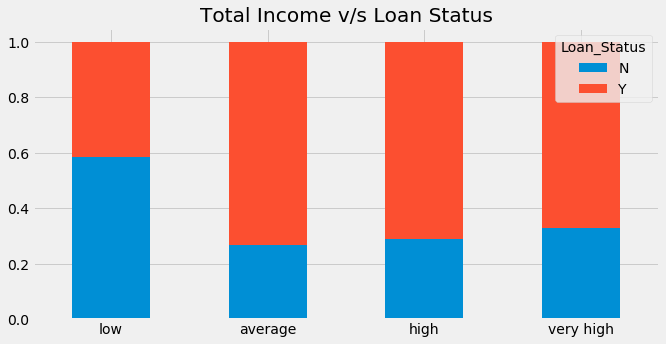

In [64]:
total_income_bin.div(total_income_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.xlabel(None)
plt.title("Total Income v/s Loan Status")
plt.show()

Now this relationship looks correct that people with low total income have low chances of loan approval

<h2>Loan Amount</h2>

In [65]:
bins = [0, 100, 200, 700]
groups = ['low', 'average', 'high']

In [66]:
data['Loan_Amount_bin'] = pd.cut(data['LoanAmount'], bins, labels = groups)

In [67]:
Loan_Amount_bin = pd.crosstab(data['Loan_Amount_bin'], data['Loan_Status'])

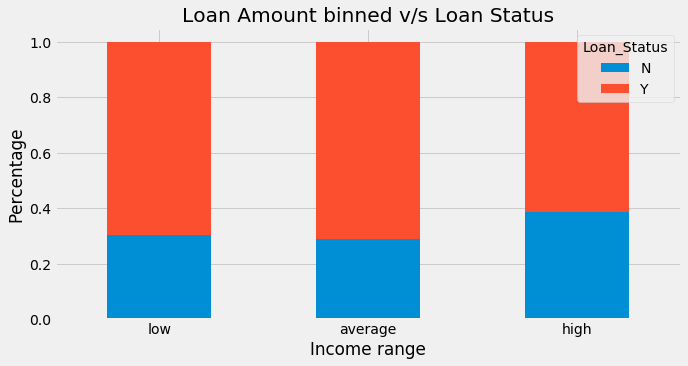

In [68]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(axis = 1), axis = 0).plot.bar(stacked = True, figsize = (10, 5))
plt.xticks(rotation = 0)
plt.xlabel("Loan Amount Range")
plt.ylabel("Percentage")
plt.title("Loan Amount binned v/s Loan Status")
plt.xlabel("Income range")
plt.show()

This supports our hypothesis that for less loan amount, chances of loan 
approval will be high

In [69]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'CoapplicantIncome_bin', 'total_income',
       'total_income_bin', 'Loan_Amount_bin'],
      dtype='object')

<h3> Dropping extra features that we had made for exploratory analysis of dataset</h3>

In [70]:
data = data.drop(['CoapplicantIncome_bin', 'Income_bin', 'Loan_Amount_bin', 'total_income_bin', 'total_income'], axis = 1)

In [71]:
data['Loan_Status'].replace("Y", 1, inplace = True)
data['Loan_Status'].replace("N", 0, inplace = True)

In [72]:
matrix = data.corr()

Text(0.5, 1, 'Correlation')

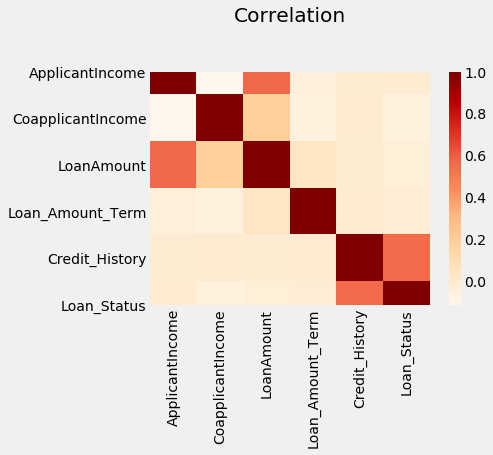

In [73]:
sns.heatmap(matrix, cmap = "OrRd", square = True)
plt.title("Correlation", pad = 50)

<h3>Most correlated variables</h3>


*   Loan Amount and Applicant Income
*   Loan Amount and Coapplicant Income
*   Credit History and Loan Status





# Missing Value Imputation

In [74]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'Missing values')

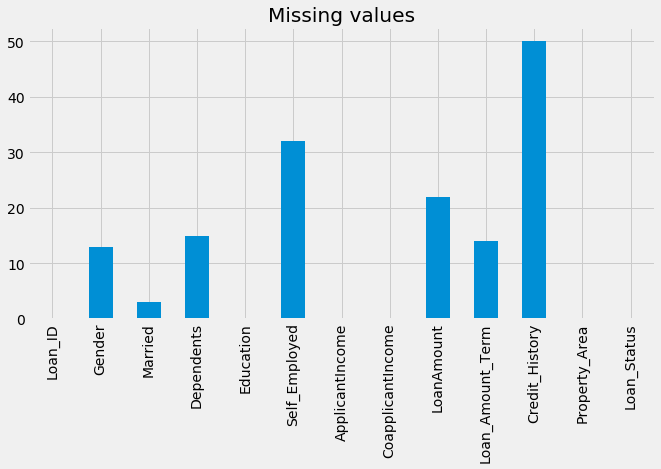

In [75]:
data.isnull().sum().plot.bar(figsize = (10, 5))
plt.title("Missing values")

Text(0.5, 1, 'Missing Values HeatMap')

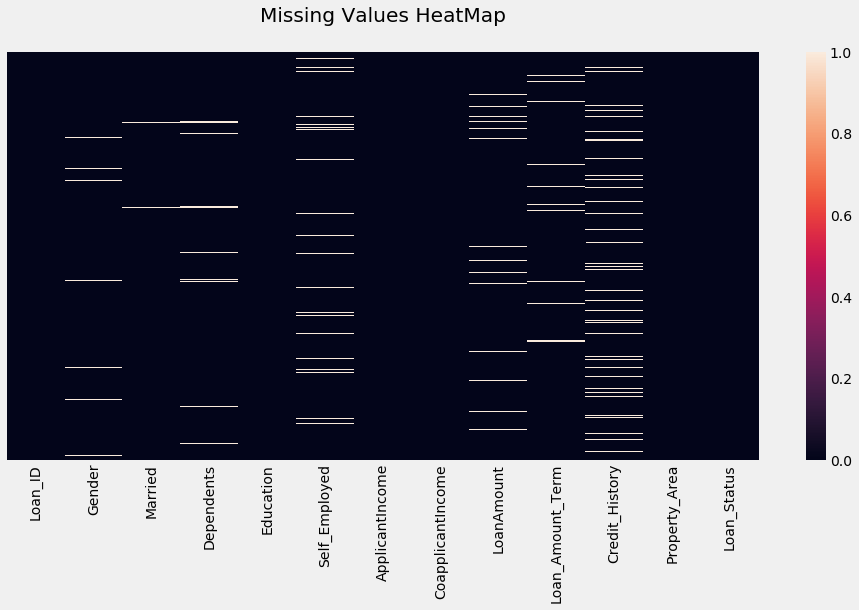

In [76]:
f, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(data.isnull())
plt.yticks([])
plt.title("Missing Values HeatMap", pad = 30)

Missing values are in gender, married, dependents, self_employed, loan amount, loan amount term, credit history.
<p>Categorical variables: Use mode</p>
<p>Numerical variables: use mean or median</p>

In [77]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace = True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace = True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace = True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace = True)

In [78]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [79]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace = True)

In [80]:
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace = True)

In [81]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier treatment

Text(0.5, 1.0, 'Loan Amount')

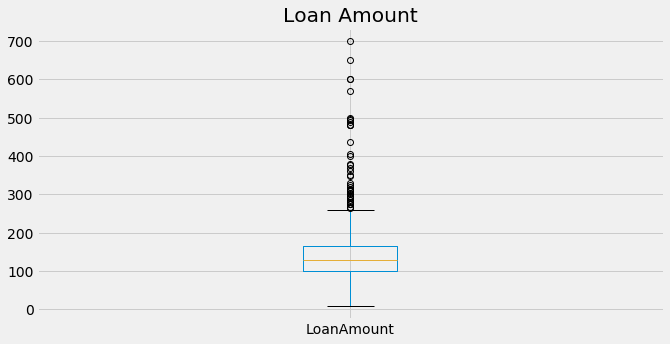

In [82]:
data["LoanAmount"].plot.box(figsize = (10, 5))
plt.title("Loan Amount")

Text(0.5, 1.0, 'Loan Amount')

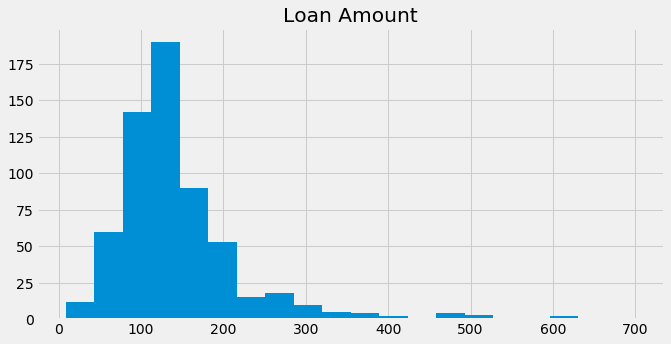

In [83]:
data["LoanAmount"].hist(bins = 20, figsize = (10, 5))
plt.title("Loan Amount")

Most of the data is concentrated on the left but due to outliers it becomes right skewed.

Using log transform to make the data normalized.

In [84]:
data["LoanAmount_log"] = np.log(data["LoanAmount"])

Text(0.5, 1.0, 'LoanAmount Transformed feature')

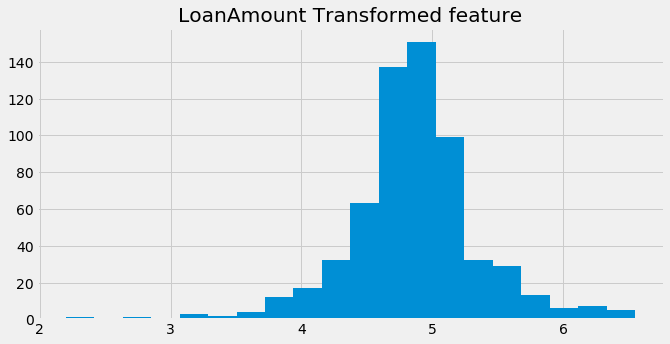

In [85]:
data["LoanAmount_log"].hist(bins = 20, figsize = (10, 5))
plt.title("LoanAmount Transformed feature")

In [86]:
data["LoanAmount_log"] = np.log(data["LoanAmount"])

Now the distribution looks much normal.

# Model Building : Part 1

Now we will apply logistic regression to this problem beacuse it is a classification problem.

In [87]:
# Dropping Loan ID because it is not an important feature for prediction
data = data.drop('Loan_ID', axis = 1)

<h3> Doing one hot encoding</h3>

In [88]:
data['Married'] = pd.get_dummies(data['Married']).drop('No', axis = 1)

In [89]:
data['Education'] = pd.get_dummies(data['Education']).drop('Not Graduate', axis = 1)

In [90]:
data['Self_Employed'] = pd.get_dummies(data['Self_Employed']).drop('No', axis = 1)

In [91]:
data['Gender'] = pd.get_dummies(data['Gender']).drop('Female', axis = 1)

In [92]:
data['Dependents0'] = pd.get_dummies(data['Dependents'])['0']
data['Dependents1'] = pd.get_dummies(data['Dependents'])['1']
data['Dependents2'] = pd.get_dummies(data['Dependents'])['2']

In [93]:
data.drop('Dependents', 1, inplace = True)

In [94]:
data = pd.concat([pd.get_dummies(data['Property_Area']).drop('Urban', 1), data.drop('Property_Area', 1)], axis = 1)

In [95]:
X = data.drop('Loan_Status', axis = 1)
y = data["Loan_Status"]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

<h3>Training and evaluation of the model</h3>

<h3> Logistic Regression </h3>


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression(random_state = 4)

In [100]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=4, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on train

In [101]:
y_pred_train = model.predict(X_train)


In [102]:
accuracy_score(y_pred_train, y_train)*100

81.4663951120163

# Accuracy on test

In [103]:
y_pred = model.predict(X_test)

In [104]:
accuracy_score(y_pred, y_test)*100

80.48780487804879

Model has 80% accuracy


# Feature Engineering

We can come up with new features that might affect the target variable.

<h3>Total Income</h3>

In [105]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

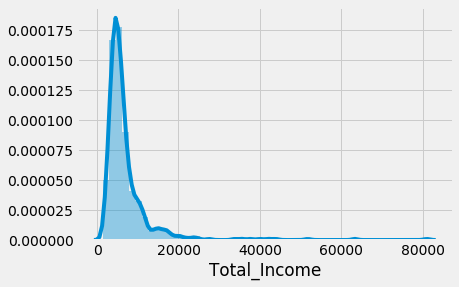

In [106]:
sns.distplot(data['Total_Income'])

This distribution is right skewed.
Making a log transformation will make it normal

In [107]:
data['Total_Income_log'] = np.log(data['Total_Income'])

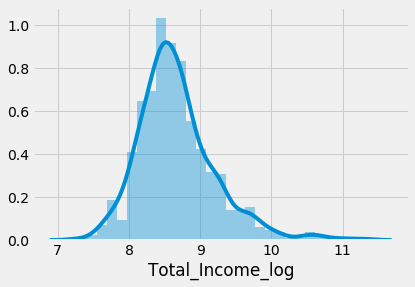

In [108]:
sns.distplot(data['Total_Income_log'])

<h3>EMI</h3>

In [109]:
data['EMI'] = data['LoanAmount']/data['Loan_Amount_Term'] 

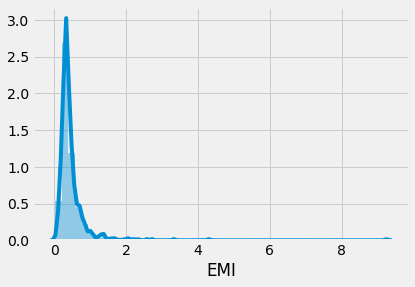

In [110]:
sns.distplot(data['EMI'])

In [111]:
data['Balance_Income'] = data['Total_Income'] - (data['EMI']*1000)

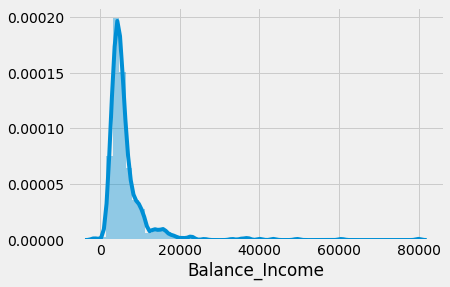

In [112]:
sns.distplot(data['Balance_Income'])

In [113]:
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

# Model Building: part 2

In [114]:
X = data.drop('Loan_Status', 1)

In [115]:
y = data['Loan_Status']

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

<h2>Logistic Regression</h2>

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [119]:
model1 = LogisticRegression(random_state = 4)

In [120]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=4, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on train

In [121]:
y_pred_train1 = model1.predict(X_train)

In [122]:
accuracy_score(y_pred_train1, y_train)*100

81.05906313645622

Accuracy on test

In [123]:
y_pred_test = model1.predict(X_test)

In [124]:
accuracy_score(y_pred_test, y_test)*100

80.48780487804879

<h2>Decision Tree</h2>

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model2 = DecisionTreeClassifier(random_state = 1)

In [127]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Accuracy on train

In [128]:
y_pred_train2 = model2.predict(X_train)

In [129]:
accuracy_score(y_pred_train2, y_train)*100

100.0

Accuracy on test

In [130]:
y_pred_test2 = model2.predict(X_test)

In [131]:
accuracy_score(y_pred_test2, y_test)*100

73.17073170731707

Looks that decision tree has overfitted the data.

<h2>Random Forest</h2>

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
model3 = RandomForestClassifier(random_state = 1, max_depth = 10)

In [134]:
model3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Accuracy on train

In [135]:
y_pred_train3 = model3.predict(X_train)

In [136]:
accuracy_score(y_pred_train3, y_train)*100

93.07535641547861

Accuracy on test

In [137]:
y_pred_test3 = model3.predict(X_test)

In [138]:
accuracy_score(y_pred_test3, y_test)*100

78.04878048780488

This model also looks overfitted on the train set

We can infer that Logistic regression performs best without these new features